런타임 : T4 gpu 로 설정 필수

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,336 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and dire

세션 재시작

In [1]:
# 필요 라이브러리 설치
!pip install vllm bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.9/396.9 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/88

In [ ]:
# 데이터 수집
import requests
from lxml import etree
from lxml.html import fromstring
import pandas as pd

def extract_unique_images(rss_url):
    try:
        response = requests.get(rss_url)
        root = etree.fromstring(response.content)

        image_urls = set()

        for item in root.xpath('//item'):
            description = item.find('description')
            if description is not None and description.text:
                html_tree = fromstring(description.text)
                img_url = html_tree.xpath('string(//img/@src)')
                if img_url:
                    image_urls.add(img_url)

        return list(image_urls)

    except Exception as e:
        print(f"Error occurred: {e}")
        return []

# 예시로 사용하는 RSS 주소
rss_url = "https://glltn.com/feed/"
unique_images = extract_unique_images(rss_url)

# 데이터 프레임 생성
df = pd.DataFrame(unique_images, columns=["image"])

from IPython.display import display, HTML

# Display images in the DataFrame
def path_to_image_html(path):
    return f'<img src="{path}" width="300" />'

# Apply the function to generate HTML for images
df.style.set_table_styles([{'selector': 'img', 'props': 'width: 300px;'}])

display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,


In [2]:
# 이미지 분석 모델 로드
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained('openbmb/MiniCPM-V-2_6-int4', trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-V-2_6-int4', trust_remote_code=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

configuration_minicpm.py:   0%|          | 0.00/3.28k [00:00<?, ?B/s]

modeling_navit_siglip.py:   0%|          | 0.00/41.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- modeling_navit_siglip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- configuration_minicpm.py
- modeling_navit_siglip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_minicpmv.py:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

resampler.py:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- resampler.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- modeling_minicpmv.py
- resampler.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/233k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/5.64k [00:00<?, ?B/s]

tokenization_minicpmv_fast.py:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- tokenization_minicpmv_fast.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.56k [00:00<?, ?B/s]

MiniCPMV(
  (llm): Qwen2ForCausalLM(
    (model): Qwen2Model(
      (embed_tokens): Embedding(151666, 3584)
      (layers): ModuleList(
        (0-27): 28 x Qwen2DecoderLayer(
          (self_attn): Qwen2Attention(
            (q_proj): Linear4bit(in_features=3584, out_features=3584, bias=True)
            (k_proj): Linear4bit(in_features=3584, out_features=512, bias=True)
            (v_proj): Linear4bit(in_features=3584, out_features=512, bias=True)
            (o_proj): Linear4bit(in_features=3584, out_features=3584, bias=False)
          )
          (mlp): Qwen2MLP(
            (gate_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
            (up_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
            (down_proj): Linear4bit(in_features=18944, out_features=3584, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): Qwen2RMSNorm((3584,), eps=1e-06)
          (post_attention_layernorm): Qwen2RMSNorm((3584,), eps=

In [6]:
image_url = 'https://farm3.staticflickr.com/2677/4434956914_6e95a22940_z.jpg'
image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
question = 'how many cats in the photo?'
msgs = [{'role': 'user', 'content': [image, question]}]
result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
print(result)

2


In [4]:
import requests
# VLM 사용 예시
image_url = 'https://farm3.staticflickr.com/2677/4434956914_6e95a22940_z.jpg'
image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
question = 'how many cats in the photo? not including the books cover.'
msgs = [{'role': 'user', 'content': [image, question]}]
result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
print(result)

preprocessor_config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

processing_minicpmv.py:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

image_processing_minicpmv.py:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- image_processing_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-2_6-int4:
- processing_minicpmv.py
- image_processing_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=

1


In [5]:
image_url = 'https://farm3.staticflickr.com/2677/4434956914_6e95a22940_z.jpg'
image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
question = 'describe the photo'
msgs = [{'role': 'user', 'content': [image, question]}]
result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
print(result)

The image shows a book titled "Why Dogs Are Better Than Cats" by Bradley Trevor Greive, with a cover featuring a cat sitting on the head of a dog. To the right side of the book, there's a real-life gray tabby cat standing on a wooden floor, looking directly at the camera. The cat appears to be attentive and possibly curious about something outside the frame.


In [ ]:
def is_picture_of_clothing(image_url):
    question = 'Is this a picture of clothing? MUST say yes or no.'
    image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
    msgs = [{'role': 'user', 'content': [image, question]}]
    result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
    print(result)
    return 'yes' in result.lower()

df['is_clothing'] = df['image'].apply(is_picture_of_clothing)

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Yes, this image is of clothing. The striped sweater and the beige pants are prominently displayed on the young man, serving as the focal point of the photograph.
Yes, this image is of clothing. It features a person wearing what appears to be a coordinated outfit consisting of a light-colored jacket and matching pants, which are both made from the same material and color, suggesting they may be part of a set or designed to be worn together. The choice of black shoes adds a contrasting element to the otherwise monochromatic ensemble. The style of the clothing, along with the relaxed posture of the seated individual, suggests a casual yet stylish aesthetic.
No, the image is not of clothing. It is a photograph or illustration of an object that resembles a guitar-like instrument mounted on a rolling stand, which could be interpreted as some form of modern art or a conceptual piece rather than a typical garment.
Yes, this image is of clothing. The focus is on a piece of outerwear designed fo

In [ ]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing
0,,True
1,,True
2,,False
3,,True
4,,True
5,,True
6,,True
7,,False
8,,True
9,,True


In [ ]:
# is_colthing이 True인 데이터만 샘플링
df = df[df['is_clothing']]

In [ ]:
def describe_style(image_url):
    question = 'Analyze the style of the clothes. Please let me explain the colors and trend changes.'
    image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
    msgs = [{'role': 'user', 'content': [image, question]}]
    result = model.chat(image=None, msgs=msgs, tokenizer=tokenizer)
    print(result)
    return result

df['style'] = df['image'].apply(describe_style)

The clothing style depicted in the image leans towards a casual and relaxed aesthetic. The striped shirt, with its horizontal black and white stripes, is a classic pattern that has been popular in various forms for decades. Stripes are often associated with nautical themes but have also found their place in modern streetwear fashion. This particular shirt seems to be part of a trend where such patterns are favored for their timeless appeal and versatility.

The color brown, worn by the individual in what appears to be trousers or pants, suggests an earthy tone that is commonly used in casual wear due to its neutrality and ability to complement a wide range of colors. Brown is often chosen for its warmth and comfort, making it suitable for everyday outfits.

In terms of trend changes, there's a noticeable shift towards more comfortable and functional clothing, especially among younger demographics. The choice of materials and fits tends to favor ease of movement and a laid-back look. Su

In [ ]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing,style
0,,True,"The clothing style depicted in the image leans towards a casual and relaxed aesthetic. The striped shirt, with its horizontal black and white stripes, is a classic pattern that has been popular in various forms for decades. Stripes are often associated with nautical themes but have also found their place in modern streetwear fashion. This particular shirt seems to be part of a trend where such patterns are favored for their timeless appeal and versatility.\n\nThe color brown, worn by the individual in what appears to be trousers or pants, suggests an earthy tone that is commonly used in casual wear due to its neutrality and ability to complement a wide range of colors. Brown is often chosen for its warmth and comfort, making it suitable for everyday outfits.\n\nIn terms of trend changes, there's a noticeable shift towards more comfortable and functional clothing, especially among younger demographics. The choice of materials and fits tends to favor ease of movement and a laid-back look. Such styles reflect a broader cultural movement away from formal attire and towards personal expression through clothing.\n\nOverall, the outfit can be seen as representative of contemporary casual fashion trends that emphasize comfort, simplicity, and a touch of classic styling."
1,,True,"The style of the clothes in the image suggests a minimalist and possibly retro aesthetic. The beige or light grey color of the outfit is neutral and versatile, often associated with classic and timeless fashion choices. This color can evoke a sense of calmness and simplicity.\n\nThe clothing appears to be made from a soft, possibly linen-like fabric, which is popular for its comfort and breathability, especially suitable for warmer weather. Linen is also known for its natural texture and slightly wrinkled appearance when worn, adding to the casual yet stylish look.\n\nThe loose fit of the pants and jacket indicates a preference for comfortable, relaxed attire that doesn't restrict movement. Such styles are often seen in modern interpretations of vintage fashion trends, where there's an emphasis on ease and a nod to past decades' fashion sensibilities.\n\nOverall, the clothing choice reflects a trend towards functional, comfortable, and aesthetically pleasing garments that have stood the test of time, appealing to those who appreciate understated elegance and practicality in their wardrobe."
3,,True,"The style of the clothes in the image suggests a practical and utilitarian design, likely chosen for outdoor activities. The light blue color of the jacket is often associated with visibility and calmness, which can be desirable in both urban settings and natural environments. This color choice might also indicate that the clothing is designed to stand out against various backgrounds, enhancing safety during outdoor adventures.\n\nThe hooded design provides additional protection from elements such as rain or wind, while the multiple pockets suggest functionality and ease of access to essential items. The presence of straps on the backpack indicates that it is adjustable, allowing for secure carrying of gear during movement. \n\nIn terms of trend changes, this type of attire reflects a broader fashion trend towards functional and versatile clothing. There's an emphasis on comfort, durability, and adaptability rather than purely aesthetic considerations. Such garments are popular among hikers, campers, and outdoor enthusiasts who prioritize performance over fashion statements. The overall look is modern yet timeless, suggesting a blend of contemporary trends with classic outdoor wear designs."
4,,True,"The style of the clothes in the image reflects a blend of classic and contemporary fashion trends. The black overcoat is a timeless piece that has been a staple in men's wardrobes for decades, offering both functionality and elegance. It appears to be well-tailored, suggesting quality craftsmanship.\n\nUnderneath the coat, there is a 

In [ ]:
from vllm import LLM, SamplingParams

llm = LLM(model="LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct", gpu_memory_utilization=0.6)

INFO 02-27 08:53:23 __init__.py:207] Automatically detected platform cuda.
INFO 02-27 08:53:23 config.py:2444] Downcasting torch.float32 to torch.float16.
INFO 02-27 08:53:42 config.py:549] This model supports multiple tasks: {'generate', 'embed', 'reward', 'score', 'classify'}. Defaulting to 'generate'.
INFO 02-27 08:53:42 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct', speculative_config=None, tokenizer='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 02-27 08:54:44 model_runner.py:1115] Loading model weights took 4.5150 GB
INFO 02-27 08:54:51 worker.py:267] Memory profiling takes 6.67 seconds
INFO 02-27 08:54:51 worker.py:267] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.60) = 8.84GiB
INFO 02-27 08:54:51 worker.py:267] model weights take 4.51GiB; non_torch_memory takes 0.02GiB; PyTorch activation peak memory takes 1.94GiB; the rest of the memory reserved for KV Cache is 2.37GiB.
INFO 02-27 08:54:51 executor_base.py:111] # cuda blocks: 2072, # CPU blocks: 3495
INFO 02-27 08:54:51 executor_base.py:116] Maximum concurrency for 32768 tokens per request: 1.01x
INFO 02-27 08:54:57 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utili

Capturing CUDA graph shapes: 100%|██████████| 35/35 [01:07<00:00,  1.91s/it]

INFO 02-27 08:56:04 model_runner.py:1562] Graph capturing finished in 67 secs, took 0.21 GiB
INFO 02-27 08:56:04 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 80.30 seconds


In [ ]:
def extract_color(style):
  prompt = [
      {
          "role": "system",
          "content": "You are EXAONE model from LG AI Research, a helpful assistant."
      },
      {
          "role": "user",
          "content": f"다음의 글에서 색상을 한글로 추출해주세요. 색상 외에 다른 정보는 적지 말아주세요.\n{style}"
      }
  ]
  sampling_params = SamplingParams(temperature=0.2, top_p=0.95, max_tokens=1024)
  result = llm.chat(prompt, sampling_params)[0].outputs[0].text
  print(result)
  return result

df['color'] = df['style'].apply(extract_color)

INFO 02-27 08:56:04 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s, est. speed input: 446.20 toks/s, output: 22.53 toks/s]


**색상:**
- 검정색
- 흰색
- 갈색


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s, est. speed input: 489.99 toks/s, output: 36.56 toks/s]


**색상:**
- 베이지 (Beige)
- 연한 회색 (Light Grey)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s, est. speed input: 1062.43 toks/s, output: 27.64 toks/s]


색상: **하늘색**


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s, est. speed input: 389.94 toks/s, output: 32.72 toks/s]


색상:
- 검정색 (black)
- 회색 (grey)
- 흰색 (white)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s, est. speed input: 313.83 toks/s, output: 13.07 toks/s]


**색상:**
- 회색 (grey)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s, est. speed input: 405.19 toks/s, output: 8.37 toks/s]


 beige
brown


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s, est. speed input: 350.34 toks/s, output: 14.11 toks/s]


**색상:**
- 파란색
- 흰색


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it, est. speed input: 336.91 toks/s, output: 18.83 toks/s]


**색상:**
- 베이지 (Beige)
- 검정색 (Black)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s, est. speed input: 378.28 toks/s, output: 37.43 toks/s]


- **남성**: 네이비 (Navy)
- **여성**: 베이지/라이트 브라운 (Beige/Light Brown)


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s, est. speed input: 1090.51 toks/s, output: 28.27 toks/s]

색상:
- 검정색


In [ ]:
def extract_color(style):
  prompt = [
      {
          "role": "system",
          "content": "You are EXAONE model from LG AI Research, a helpful assistant."
      },
      {
          "role": "user",
          "content": f"다음의 글에서 스타일 키워드를 한글로 추출해주세요. 스타일 키워드 외에 다른 정보는 적지 말아주세요.\n{style}"
      }
  ]
  sampling_params = SamplingParams(temperature=0.2, top_p=0.95, max_tokens=1024)
  result = llm.chat(prompt, sampling_params)[0].outputs[0].text
  print(result)
  return result

df['keyword'] = df['style'].apply(extract_color)

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s, est. speed input: 318.21 toks/s, output: 38.31 toks/s]


- 캐주얼
- 편안함
- 클래식 패턴 (스트라이프)
- 중성적 색상 (갈색)
- 실용성
- 편안한 움직임
- 개인 표현


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.57s/it, est. speed input: 172.56 toks/s, output: 34.51 toks/s]


스타일 키워드:
- 미니멀리즘
- 레트로
- 중립적 색상 (베이지/라이트 그레이)
- 클래식
- 심플함
- 편안함
- 린넨 소재
- 자연스러운 질감
- 캐주얼하면서도 세련됨


Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it, est. speed input: 121.91 toks/s, output: 27.89 toks/s]


- 실용적 디자인
- 야외 활동용
- 가시성 및 평온함 연상
- 다양한 배경에서의 가시성 향상
- 방수 기능
- 다기능 포켓
- 조절 가능한 스트랩
- 기능성 및 유연성 중시
- 현대적이면서도 고전적인 스타일


Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it, est. speed input: 104.65 toks/s, output: 29.95 toks/s]


- **클래식**
- **현대적**
- **기능성**
- **우아함**
- **품질**
- **층층이**
- **깊이**
- **텍스처**
- **중립적**
- **속삭임**
- **전통적**
- **레트로**
- **균형**


Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it, est. speed input: 137.13 toks/s, output: 29.79 toks/s]


- 현대적 미니멀리즘
- 깔끔한 선
- 단색 색상
- 유연한 테일러링
- 중성적 톤 선호
- 전문성과 세련됨
- 전통적 디자인에서의 변화
- 스트림라인
- 가능성 있는 성 중립성
- 덜 엄격한 해석


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.91s/it, est. speed input: 127.60 toks/s, output: 26.67 toks/s]


- 현대적 캐주얼 패션 트렌드
- muted 색상 (베이지, 브라운)
- earthy 톤
- Versatility
- Timeless appeal
- Relaxed yet Stylish look
- Functional aesthetics
- Subtlety
- Comfort


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it, est. speed input: 191.50 toks/s, output: 27.16 toks/s]


- 캐주얼
- 레이어링
- 데님
- 미니멀리즘
- muted 색상
- 심플함
- 기능성
- 빈티지 요소
- 편안함과 스타일의 조화


Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it, est. speed input: 157.71 toks/s, output: 35.05 toks/s]


- 캐주얼
- 세미캐주얼
-Khakis/Chinos
-편안함
-인formal touch
-moccasin 스타일
-블랙 데님
-전통적인 재료
-gold stitching
-중성적인 색상
-베이지
-다크 블루/블랙 데님
-실용성
-클래식 디자인 요소
-현대적인 감각


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it, est. speed input: 212.37 toks/s, output: 40.24 toks/s]


- 미니멀리즘
- 현대적
- 깔끔한 선
- 중성색
- 단순함
- 클래식 요소
- 캐주얼
- 세련됨
-Earth Tone
- Understated Elegance
- Versatility
- Timeless Pieces


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it, est. speed input: 147.82 toks/s, output: 41.30 toks/s]

- **미니멀리즘**
- **실용성**
- **기능성**
- **단순함**
- **편안함**
- **유연성**
- **대담함**
- **순수성**
- **전통적/ bespoke**
- **품질**
- **시간대**
- **기능적**


In [ ]:
display(HTML(df.to_html(escape=False, formatters=dict(**{'image': path_to_image_html}))))

,image,is_clothing,style,color,keyword
0,,True,"The clothing style depicted in the image leans towards a casual and relaxed aesthetic. The striped shirt, with its horizontal black and white stripes, is a classic pattern that has been popular in various forms for decades. Stripes are often associated with nautical themes but have also found their place in modern streetwear fashion. This particular shirt seems to be part of a trend where such patterns are favored for their timeless appeal and versatility.\n\nThe color brown, worn by the individual in what appears to be trousers or pants, suggests an earthy tone that is commonly used in casual wear due to its neutrality and ability to complement a wide range of colors. Brown is often chosen for its warmth and comfort, making it suitable for everyday outfits.\n\nIn terms of trend changes, there's a noticeable shift towards more comfortable and functional clothing, especially among younger demographics. The choice of materials and fits tends to favor ease of movement and a laid-back look. Such styles reflect a broader cultural movement away from formal attire and towards personal expression through clothing.\n\nOverall, the outfit can be seen as representative of contemporary casual fashion trends that emphasize comfort, simplicity, and a touch of classic styling.",**색상:**\n- 검정색\n- 흰색\n- 갈색,- 캐주얼\n- 편안함\n- 클래식 패턴 (스트라이프)\n- 중성적 색상 (갈색)\n- 실용성\n- 편안한 움직임\n- 개인 표현
1,,True,"The style of the clothes in the image suggests a minimalist and possibly retro aesthetic. The beige or light grey color of the outfit is neutral and versatile, often associated with classic and timeless fashion choices. This color can evoke a sense of calmness and simplicity.\n\nThe clothing appears to be made from a soft, possibly linen-like fabric, which is popular for its comfort and breathability, especially suitable for warmer weather. Linen is also known for its natural texture and slightly wrinkled appearance when worn, adding to the casual yet stylish look.\n\nThe loose fit of the pants and jacket indicates a preference for comfortable, relaxed attire that doesn't restrict movement. Such styles are often seen in modern interpretations of vintage fashion trends, where there's an emphasis on ease and a nod to past decades' fashion sensibilities.\n\nOverall, the clothing choice reflects a trend towards functional, comfortable, and aesthetically pleasing garments that have stood the test of time, appealing to those who appreciate understated elegance and practicality in their wardrobe.",**색상:**\n- 베이지 (Beige)\n- 연한 회색 (Light Grey),스타일 키워드:\n- 미니멀리즘\n- 레트로\n- 중립적 색상 (베이지/라이트 그레이)\n- 클래식\n- 심플함\n- 편안함\n- 린넨 소재\n- 자연스러운 질감\n- 캐주얼하면서도 세련됨
3,,True,"The style of the clothes in the image suggests a practical and utilitarian design, likely chosen for outdoor activities. The light blue color of the jacket is often associated with visibility and calmness, which can be desirable in both urban settings and natural environments. This color choice might also indicate that the clothing is designed to stand out against various backgrounds, enhancing safety during outdoor adventures.\n\nThe hooded design provides additional protection from elements such as rain or wind, while the multiple pockets suggest functionality and ease of access to essential items. The presence of straps on the backpack indicates that it is adjustable, allowing for secure carrying of gear during movement. \n\nIn terms of trend changes, this type of attire reflects a broader fashion trend towards functional and versatile clothing. There's an emphasis on comfort, durability, and adaptability rather than purely aesthetic considerations. Such garments are popular among hikers, campers, and outdoor enthusiasts who prioritize performance over fashion statements. The overall look is modern yet timeless, suggesting a blend of contemporary trends with classic outdoor wear designs.",색상: **하늘색**,- 실용적 디자인\n- 야외 활동용\n- 가시성 및 평온함 연상\n- 다양한 배경에서의 가시성 향상\n- 방수 기능\n- 

In [ ]:
import re

def clean_text(text):
    """
    주어진 텍스트에서 특수문자, HTML 태그 등을 제거하고 소문자로 변환하는 함수
    """
    if isinstance(text, str): # 문자열인 경우에만 정제
       # 1. 특수문자 제거
       text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)

       # 2. HTML 태그 제거
       text = re.sub(r'<[^>]*>', '', text)

       # 3. 대소문자 통일
       text = text.lower()
       return text
    else:
        return "" # 문자열이 아닌 경우 빈 문자열 반환

df['color'] = df['color'].apply(clean_text)
df['keyword'] = df['keyword'].apply(clean_text)

In [ ]:
from collections import Counter

def get_word_count(df):
    # 단어 빈도 계산
    if not df.empty:
        all_nouns = df['color'].apply(str.split).sum()
        all_nouns += df['keyword'].apply(str.split).sum()
        all_nouns = [word for word in all_nouns if word not in ['색상']]
        return Counter(all_nouns)

get_word_count(df)

Counter({'검정색': 4,
         '흰색': 3,
         '갈색': 2,
         '베이지': 4,
         'beige': 3,
         '연한': 1,
         '회색': 3,
         'light': 1,
         'grey': 3,
         '하늘색': 1,
         'black': 2,
         'white': 1,
         'brown': 2,
         '파란색': 1,
         '남성': 1,
         '네이비': 1,
         'navy': 1,
         '여성': 1,
         '베이지라이트': 2,
         '브라운': 2,
         'beigelight': 1,
         '캐주얼': 5,
         '편안함': 4,
         '클래식': 5,
         '패턴': 1,
         '스트라이프': 1,
         '중성적': 2,
         '실용성': 3,
         '편안한': 1,
         '움직임': 1,
         '개인': 1,
         '표현': 1,
         '스타일': 3,
         '키워드': 1,
         '미니멀리즘': 5,
         '레트로': 2,
         '중립적': 2,
         '그레이': 1,
         '심플함': 2,
         '린넨': 1,
         '소재': 1,
         '자연스러운': 1,
         '질감': 1,
         '캐주얼하면서도': 1,
         '세련됨': 3,
         '실용적': 1,
         '디자인': 2,
         '야외': 1,
         '활동용': 1,
         '가시성': 2,
         '및': 2,
         '평온함'

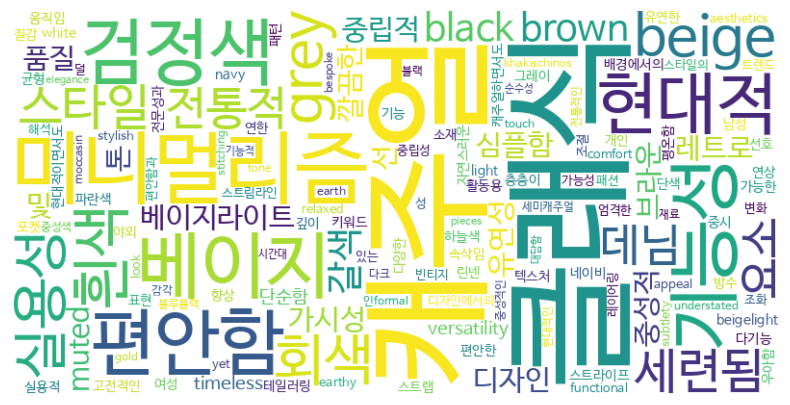

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(word_count):
    # WordCloud 생성
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white', # 배경색 설정
        colormap='viridis',  # 색상 설정
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        ).generate_from_frequencies(word_count) # frequencies를 넣어줍니다.

    # matplotlib을 사용하여 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 축 제거
    plt.show()

word_count = get_word_count(df)
create_wordcloud(word_count)

In [ ]:
# 보고서 생성
prompt = [
    {
        "role": "system",
        "content": "You are EXAONE model from LG AI Research, a helpful assistant."
    }
]
for row in df.itertuples():
  prompt.append({"role": "user", "content": f"스타일 노트: {row.style}\n이미지 url:{row.image}"})
prompt.append({"role": "user", "content": "주어진 스타일 노트를 토대로 종합적인 트렌드 방향의 분석 보고서를 작성해주세요. 보고서의 제목은 해외 룩북 스타일 분석입니다. 내용은 전문적이면서 명확하게 작성해주세요. 문서 형식은 마크다운 입니다. 예시 이미지를 적절한 곳에 추가해서 바로 볼 수 있도록 해주세요."})

sampling_params = SamplingParams(temperature=0.2, top_p=0.95, max_tokens=4096)
result = llm.chat(prompt, sampling_params)[0].outputs[0].text

Processed prompts: 100%|██████████| 1/1 [00:30<00:00, 30.09s/it, est. speed input: 101.98 toks/s, output: 38.61 toks/s]


In [ ]:
result

'# 해외 룩북 스타일 분석 보고서\n\n## 개요\n본 보고서는 최근 여러 해외 패션 룩북에서 관찰되는 주요 트렌드를 종합적으로 분석하고, 이를 통해 현재 패션 산업의 방향성을 파악하는 데 초점을 맞춥니다. 다양한 이미지와 함께 주요 포인트를 정리하여 제시합니다.\n\n## 트렌드 분석\n\n### 1. **미니멀리즘과 기능성의 융합**\n- **예시 이미지**: [Verytage Fall-Winter 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/verytage-fall-winter-2025-collection-lookbook-15-1024x683.jpg)\n  - **특징**: 중립적인 색상 팔레트 (베이지, 그레이, 화이트)와 깔끔한 라인 디자인을 통해 단순함과 실용성을 강조.\n  - **트렌드**: 현대적인 스트리트웨어와 미니멀한 클래식 스타일의 결합으로, 다양한 상황에 유연하게 대응 가능한 의류 선호.\n\n### 2. **클래식과 현대의 조화**\n- **예시 이미지**: [Engineered Garments Fall-Winter 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/engineered-garments-fall-winter-2025-collection-lookbook-01-1024x683.jpg)\n  - **특징**: 고전적인 소재와 디자인 요소 (예: linen, grey suits)를 현대적인 해석으로 재해석.\n  - **트렌드**: 과거의 패션 요소를 현대적 맥락에 맞게 재해석하여, 전통과 현대의 균형을 추구하는 경향.\n\n### 3. **실용성과 편안함의 강조**\n- **예시 이미지**: [And Wander Spring-Summer 2025 Collection Lookbook](https://glltn.com/wp-content

In [ ]:
from IPython.display import display, Markdown

# result의 markdown을 포맷팅해서 출력
display(Markdown(result))

# 해외 룩북 스타일 분석 보고서

## 개요
본 보고서는 최근 여러 해외 패션 룩북에서 관찰되는 주요 트렌드를 종합적으로 분석하고, 이를 통해 현재 패션 산업의 방향성을 파악하는 데 초점을 맞춥니다. 다양한 이미지와 함께 주요 포인트를 정리하여 제시합니다.

## 트렌드 분석

### 1. **미니멀리즘과 기능성의 융합**
- **예시 이미지**: [Verytage Fall-Winter 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/verytage-fall-winter-2025-collection-lookbook-15-1024x683.jpg)
  - **특징**: 중립적인 색상 팔레트 (베이지, 그레이, 화이트)와 깔끔한 라인 디자인을 통해 단순함과 실용성을 강조.
  - **트렌드**: 현대적인 스트리트웨어와 미니멀한 클래식 스타일의 결합으로, 다양한 상황에 유연하게 대응 가능한 의류 선호.

### 2. **클래식과 현대의 조화**
- **예시 이미지**: [Engineered Garments Fall-Winter 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/engineered-garments-fall-winter-2025-collection-lookbook-01-1024x683.jpg)
  - **특징**: 고전적인 소재와 디자인 요소 (예: linen, grey suits)를 현대적인 해석으로 재해석.
  - **트렌드**: 과거의 패션 요소를 현대적 맥락에 맞게 재해석하여, 전통과 현대의 균형을 추구하는 경향.

### 3. **실용성과 편안함의 강조**
- **예시 이미지**: [And Wander Spring-Summer 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/and-wander-spring-summer-2025-collection-lookbook-23-1024x682.jpg)
  - **특징**: 기능적인 디자인 요소 (예: hooded jackets, multiple pockets)와 편안한 소재 사용 (예: linen).
  - **트렌드**: 야외 활동과 일상 생활 모두에서 편안함과 실용성을 중시하는 경향.

### 4. **색상과 소재의 중성적 선택**
- **예시 이미지**: [Uru Spring-Summer 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/uru-spring-summer-2025-collection-lookbook-22-1024x683.jpg)
  - **특징**: 베이지, 그레이, 블랙 등의 중성적 색상과 데님 소재의 활용.
  - **트렌드**: 다양한 상황에 잘 어울리는 중성적 색상과 내구성이 뛰어난 소재의 선호.

### 5. **기능성과 스타일의 균형**
- **예시 이미지**: [45R Yuketen Spring-Summer 2025 Denim Chukka](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/45r-yuketen-spring-summer-2025-denim-chukka-06-1024x683.jpg)
  - **특징**: 기능적인 디테일 (예: 노출된 내부 라이닝, 조정 가능한 스트랩)과 편안한 착용감의 조화.
  - **트렌드**: 실용성과 스타일 사이의 균형을 추구하며, 일상과 여가 활동 모두에 적합한 의류 선호.

### 6. **개인 표현과 실용성의 결합**
- **예시 이미지**: [Ekal Spring-Summer 2025 Collection Lookbook](https://glltn.com/wp-content/blogs.dir/1/files/2025/02/ekal-spring-summer-2025-collection-lookbook-01-1024x682.jpg)
  - **특징**: 간결한 디자인과 실용적인 요소를 통해 개인의 스타일을 표현.
  - **트렌드**: 패션을 통해 개인의 개성과 스타일을 강조하면서도 실용적인 선택을 유지하는 경향.

## 결론
현재 패션 트렌드는 미니멀리즘과 기능성의 융합, 클래식 요소의 현대적 재해석, 그리고 실용성과 편안함의 중요성을 강조하는 방향으로 진화하고 있습니다. 이러한 경향은 소비자들이 다양한 상황에서 유연하게 대응할 수 있는 의류를 선호하며, 동시에 개인의 독특한 스타일을 표현할 수 있는 여지를 제공합니다. 이러한 분석은 패션 디자이너와 소비자 모두에게 미래의 디자인 방향성을 제시하는 중요한 지표가 될 것입니다.